# Sales of gaming platforms and computer games

**The goal of the researc** is to conduct data analysis of:

1. Sales analysis:
* changes in sales by gaming platform and year of release of games
* global game sales by platform
* impact on sales from user reviews and critics
* general distribution of games by genre

2. Description of users by region:
* most popular platforms
* most popular genres

3. Testing hypotheses:
* average user ratings for Xbox One and PC platforms are the same
* average user ratings for the Action and Sports genres are different.

**Initial data**:

The initial data is extracted from the `games.csv` file.
 
The research is divided into five staps:
  1. Data overview 
  2. Pre-processing
  3. In-depth analysis
  4. User characteristics
  5. Testing hypotheses


### Step 1. Data overview

In [81]:
# import libriries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns
import statistics 

In [82]:
# set up an option to show one decimal places
pd.options.display.float_format = '{:.1f}'.format

In [83]:
# read csv file and print our 5 rows
try:
    df = pd.read_csv('/datasets/games.csv')
except:  
    df = pd.read_csv('C:/YandexPracticumProjects/Project_5_ComputerGames/GitProject/games.csv')

display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.4,29.0,3.8,8.4,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.1,3.6,6.8,0.8,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.7,12.8,3.8,3.3,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.6,10.9,3.3,3.0,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.3,8.9,10.2,1.0,NaN,NaN,NaN


In [84]:
df.info() # general info about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Stap 2. Pre-processing

In [85]:
# number of rows before data cleaning
init_df = len(df.index)
print('number of rows before data cleaning:', init_df)

number of rows before data cleaning: 16715


In [86]:
# lowercase names of columns
df.columns= df.columns.str.lower()

In [87]:
# check columns for missing values
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [88]:
# calculate percentage of missing values
def missing_values (col):
    prop = col.isna().sum() / init_df
    percent = '{:.0%}'.format(prop)
    text = 'Percent of missing values in "{}":'.format(col.name) 
    print(text, percent)

In [89]:
# print out percentage of missing values
missing_values (df['name'])
missing_values (df['year_of_release'])
missing_values (df['genre'])
missing_values (df['critic_score'])
missing_values (df['user_score'])
missing_values (df['rating'])

Percent of missing values in "name": 0%
Percent of missing values in "year_of_release": 2%
Percent of missing values in "genre": 0%
Percent of missing values in "critic_score": 51%
Percent of missing values in "user_score": 40%
Percent of missing values in "rating": 40%


Missing values could appear due to incorrect input by users, as well as a result of converting from other formats when forming a dataframe.

In [90]:
# calculate percentage of 'tbd' in dataframe (to be defined)
def str_in_column (data, str):
    tbd_number = len(data[data['user_score'] == str].index)
    prop = tbd_number / init_df
    percent = '{:.0%}'.format(prop)
    text = 'Percent of "{}" in "user_score":'.format(str) 
    print(text, percent)

In [91]:
# percentage of 'tbd' in dataframe 
str_in_column (df, 'tbd')

Percent of "tbd" in "user_score": 15%


Fill in 'user_score' with -1 where there is a value of 'tbd' to filter them later on for further analysis

In [92]:
# fill in 'tbd' values with -1
df.loc[df.user_score == 'tbd', 'user_score'] = -1

Filling in the 'critic_score' and 'user_score' columns whose rows have missing values. This prevents data loss during further analysis.

In [93]:
# list of attributes of the dataframe NaN values of which are filled in with -1
col_nan = ['critic_score', 'user_score', 'genre']

# fill in NaN values with -1
def fill_in_median(data, col_nan):
    for i in col_nan:
        data[i] = data[i].fillna(-1)
        
fill_in_median(df, col_nan)

In [94]:
# convert 'user_score' into float 
df['user_score'] = df['user_score'].astype(float)

Datatype in 'critic_score' and 'year_of_release' has to be 'int' due to score and year cannot be 'float'.

In [95]:
# list of attributes of dataframe values of which are converted into int
col_float = ['critic_score', 'year_of_release']
       
# convert values into int in columns having NaN and float datatypes
def float_to_int(data, col):
    for i in col:
        data[i] = np.floor(pd.to_numeric(data[i], errors='coerce')).astype('Int64')

float_to_int(df, col_float)

In [96]:
# ckeck for explicit duplicates
print('Number of explicit duplicates:', df.duplicated().sum())

Number of explicit duplicates: 0


In [97]:
# drop explicit duplicates
# df = df.drop_duplicates().reset_index(drop=True)

In [98]:
# number of rows after data cleaning
text_1 = 'Number of rows after data cleaning:'
rows_df = len(df.index)

# percentage of rows after data cleaning
def data_ratio(itit_value, result_value, text):
    prop_data = result_value / itit_value
    percent_prop_data = '{:.0%}'.format(prop_data)
    print(text, percent_prop_data)

In [99]:
# print out percentage of rows after data cleaning
data_ratio(init_df, rows_df, text_1)

Number of rows after data cleaning: 100%


In [100]:
# fill in missing values of ESRB ranking with 'n' 
df['rating'] = df['rating'].fillna('n')
print(df['rating'].unique())

['E' 'n' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [101]:
# sales summarized in all regions
df['sales_sum'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006,Sports,41.4,29.0,3.8,8.4,76,8.0,E,82.5
1,Super Mario Bros.,NES,1985,Platform,29.1,3.6,6.8,0.8,-1,-1.0,n,40.2
2,Mario Kart Wii,Wii,2008,Racing,15.7,12.8,3.8,3.3,82,8.3,E,35.5
3,Wii Sports Resort,Wii,2009,Sports,15.6,10.9,3.3,3.0,80,8.0,E,32.8
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.3,8.9,10.2,1.0,-1,-1.0,n,31.4


In [102]:
# print out all platforms
all_platforms = list(df['platform'].unique())
print(all_platforms)

['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA', 'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']


In [103]:
# data on PC platform for hypothesis checking
pc_hip_df = df[(df['platform'] == 'PC') & (df['user_score'] >= 0)]
pc_list = list(pc_hip_df['user_score'])

# data on Xbox One platform for hypothesis checking 
x_one_hip_df = df[(df['platform'] == 'XOne') & (df['user_score'] >= 0)]
x_one_list = list(x_one_hip_df['user_score'])

In [104]:
# print out all genres
print(df['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' -1]


In [105]:
# data on genre of action for hypothesis checking
action_hip_df = df[(df['genre'] == 'Action') & (df['user_score'] >= 0)]
action_list = list(action_hip_df['user_score'])

# data on genre of sports for hypothesis checking
sports_hip_df = df[(df['genre'] == 'Sports') & (df['user_score'] >= 0)]
sports_list = list(sports_hip_df['user_score'])

In [106]:
# general info after data cleaning
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].unique())
  print(col_l,': amount of NaN',temp[col_l].isna().sum(),
        ', percentage of NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  Int64  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  sales_sum        16715 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
name : am

In [107]:
# drop NaN values in columns 'name' and 'genre'
df = df.dropna(subset=['name', 'genre'])

### Step 3. In-depth analysis

In [108]:
# group data by years of release
release_df = (df.groupby(['year_of_release'], as_index=False).agg({'name' : 'count'}))
release_df.rename({'name' : 'release_count'}, axis=1, inplace=True)

# check how many games are released from the very beginning
with pd.option_context('display.max_rows', None):
    display(release_df.sort_values('release_count', ascending=True).head(15))

,year_of_release,release_count
0,1980,9
4,1984,14
5,1985,14
8,1988,15
10,1990,16
7,1987,16
9,1989,17
3,1983,17
6,1986,21
2,1982,36


In [109]:
# number of old and new games as function of sales
release_old =\
release_df.loc[release_df['release_count'] < 100, 'release_count'].sum()
release_all = release_df['release_count'].sum()

# percentage of old games from all released
text_2 = 'Percentage of old games from all released:'

In [110]:
# print out percent of rows after data cleaning
data_ratio(release_all, release_old, text_2)

Percentage of old games from all released: 2%


In [111]:
# leave games in dataframe released after 1993
df = df[df['year_of_release'] > 1993]

In [112]:
# platforms with highest sales
top_all_platform_df = (df[['platform', 'sales_sum']]).groupby(
['platform'], as_index=False).agg({'sales_sum' : 'max'}).sort_values(['sales_sum'], ascending=False
)
top_all_platform_df = top_all_platform_df.head() 
display(top_all_platform_df)

,platform,sales_sum
24,Wii,82.5
4,GB,31.4
3,DS,29.8
26,X360,21.8
15,PS3,21.1


In [113]:
# genres with highest sales
top_all_genres_df = (df[['genre', 'sales_sum']]).groupby(
['genre'], as_index=False).agg({'sales_sum' : 'max'}).sort_values(['sales_sum'], ascending=False
)
top_all_genres_df = top_all_genres_df.head() 
display(top_all_genres_df)

,genre,sales_sum
10,Sports,82.5
6,Racing,35.5
7,Role-Playing,31.4
4,Platform,29.8
3,Misc,28.9


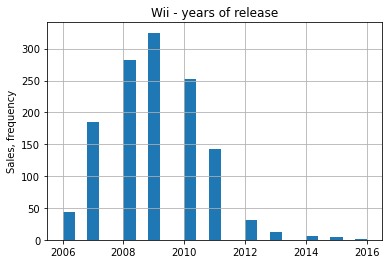

In [114]:
# histogram of distribution of Wii platform by years
df.apply(lambda x: x[df['platform'].isin(['Wii'])]).hist('year_of_release', bins=25)
plt.ylabel('Sales, frequency')
plt.title('Wii - years of release');

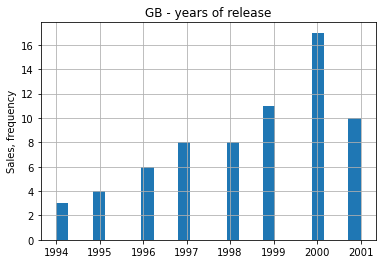

In [115]:
# histogram of distribution of GB platform by years 
df.apply(lambda x: x[df['platform'].isin(['GB'])]).hist('year_of_release', bins=25)
plt.ylabel('Sales, frequency')
plt.title('GB - years of release');

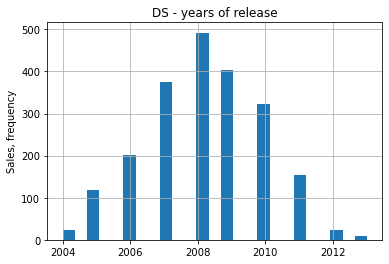

In [116]:
# histogram of distribution of DS platform by years
df.apply(lambda x: x[df['platform'].isin(['DS'])]).hist('year_of_release', bins=25)
plt.ylabel('Sales, frequency')
plt.title('DS - years of release');

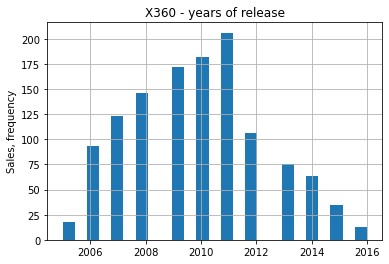

In [117]:
# histogram of distributon of X360 platform by years
df.apply(lambda x: x[df['platform'].isin(['X360'])]).hist('year_of_release', bins=25)
plt.ylabel('Sales, frequency')
plt.title('X360 - years of release');

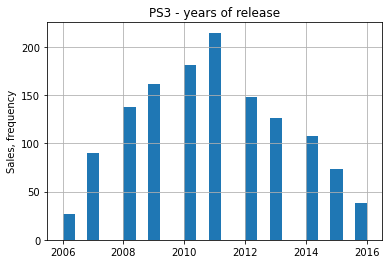

In [118]:
# histogram of distribution of PS3 platform by years
df.apply(lambda x: x[df['platform'].isin(['PS3'])]).hist('year_of_release', bins=25)
plt.ylabel('Sales, frequency')
plt.title('PS3 - years of release');


As can be seen from the histograms, the period of release of games for platforms is approximately 10 years.

In [119]:
# filter dataframe by new games to perform analysis
anal_df = df[(df['year_of_release'] > 2011)]
anal_df = anal_df.apply(lambda x: x[df['platform'].isin(all_platforms)])

In [120]:
# leave new games with highest sales in dataframe
top_new_platform_df = (anal_df[['platform', 'sales_sum']]).groupby(
['platform'], as_index=False).agg({'sales_sum' : 'max'}).sort_values(['sales_sum'], ascending=False
)
top_new_platform_df = top_new_platform_df.head()
display(top_new_platform_df)

,platform,sales_sum
3,PS3,21.1
9,X360,16.3
4,PS4,14.6
0,3DS,14.6
1,DS,8.1


In [121]:
# statistical info on dataframe after all filters
anal_df['sales_sum'].describe()

count   2886.0
mean       0.5
std        1.2
min        0.0
25%        0.0
50%        0.1
75%        0.4
max       21.1
Name: sales_sum, dtype: float64

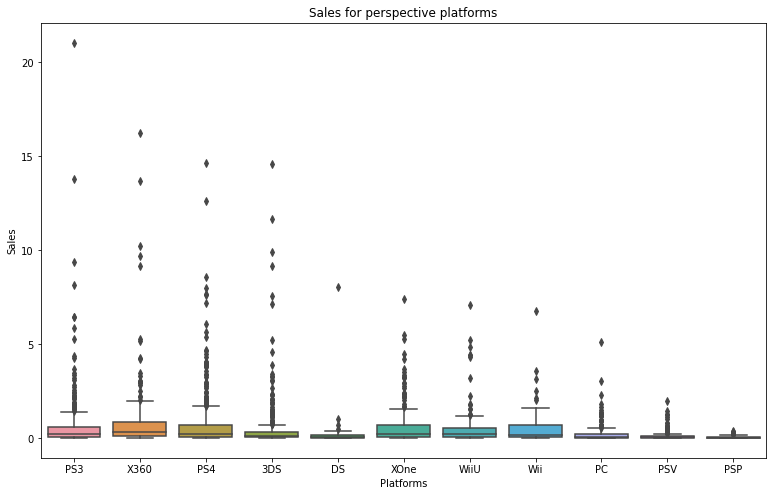

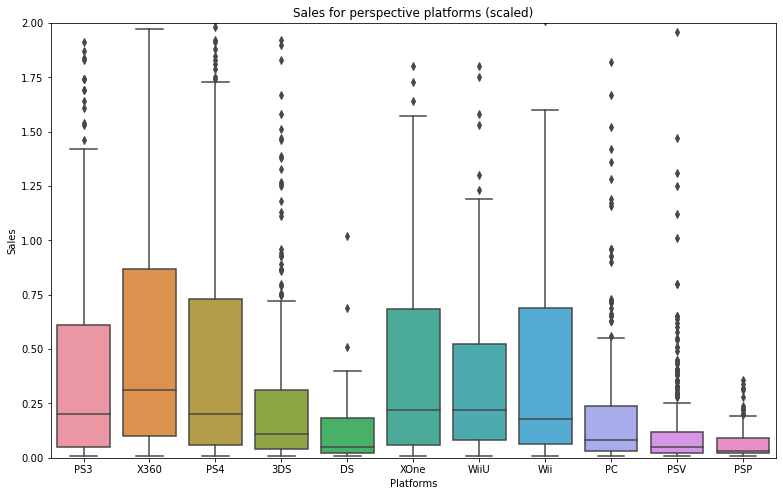

In [148]:
# build a bloxplot by platforms
import seaborn as sns
plt.figure(figsize=(13, 8))
(sns.boxplot(data = anal_df, y = 'sales_sum', x='platform')
    .set(title = 'Sales for perspective platforms', xlabel = 'Platforms', ylabel = 'Sales'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = anal_df, y = 'sales_sum', x='platform')
    .set(title = 'Sales for perspective platforms (scaled)', 
    xlabel = 'Platforms', ylabel = 'Sales', ylim=(0, 2)))
plt.show()


For all platforms, the lower "whisker" rests on 0, this is the minimum value. For PS3, the top end is around 1.5M, for DS it's 0.5M, for X360 and Wii it's 2M - that's 1.5 interquartile range added to the 3rd quartile. This is the approximate limit of the normal range. Everything behind it is considered as outlier.

According to the median, most sales for PS3 are 0.3M, for DS 0.1M, for X360 and Wii 0.5M. Between 0.1 and 1M copies is 50% of all sales for X360 and Wii, 0 - 0.5 for PS3 and 0 - 0.3 for DS.

In [123]:
# platforms for analysis
anal_platform = ['PS3', 'X360', 'Wii']

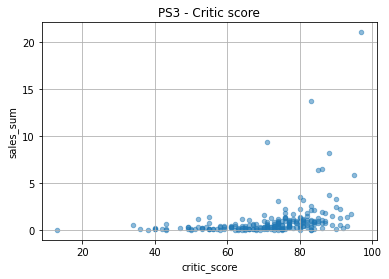

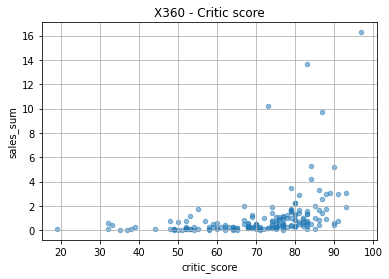

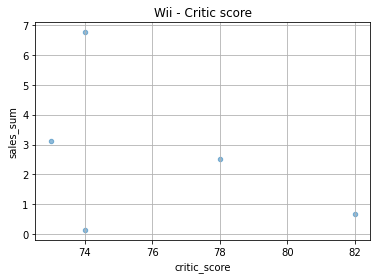

In [124]:
# scatter plot for 'critic_score'
for i in anal_platform:
    anal_df.apply(
    lambda x: x[anal_df['platform'].isin([i]) & (anal_df['critic_score'] >= 0)])\
    .plot(x='critic_score', y='sales_sum', kind='scatter', alpha=0.5, grid=True, 
          title='{} - Critic score'.format(i))

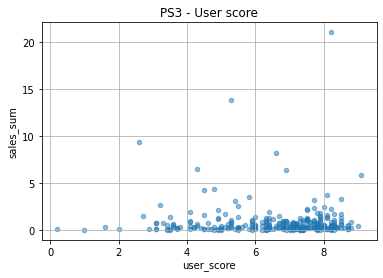

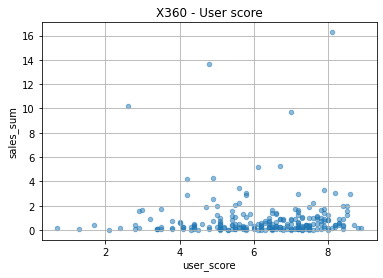

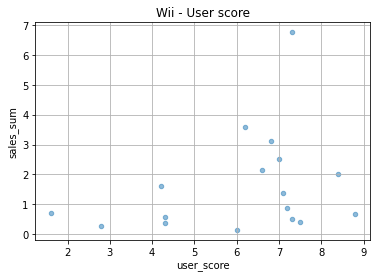

In [125]:
# scatter plot for 'user_score'
for i in anal_platform:
    anal_df.apply(
    lambda x: x[anal_df['platform'].isin([i]) & (anal_df['user_score'] >= 0)])\
    .plot(x='user_score', y='sales_sum', kind='scatter', alpha=0.5, grid=True, 
          title='{} - User score'.format(i))

In [126]:
# columns for analysis
anal_column = ['critic_score', 'user_score']

# correlation matrix for 'sales_sum', 'critic_score' and 'user_score'
for i in anal_platform:
    for j in anal_column:
        corr_df = anal_df.apply(
        lambda x: x[anal_df['platform'].isin([i]) & (anal_df[j] >= 0)])
                
    corr_df = corr_df[['sales_sum', 'critic_score', 'user_score']]
    print('Pearson correlation coefficients for {}'.format(i))
    print('-------------------------------------------------')
    print(corr_df.corr()) 
    print('=================================================')

Pearson correlation coefficients for PS3
-------------------------------------------------
              sales_sum  critic_score  user_score
sales_sum           1.0           0.2        -0.0
critic_score        0.2           1.0         0.3
user_score         -0.0           0.3         1.0
Pearson correlation coefficients for X360
-------------------------------------------------
              sales_sum  critic_score  user_score
sales_sum           1.0           0.3         0.0
critic_score        0.3           1.0         0.4
user_score          0.0           0.4         1.0
Pearson correlation coefficients for Wii
-------------------------------------------------
              sales_sum  critic_score  user_score
sales_sum           1.0           0.4         0.3
critic_score        0.4           1.0         0.4
user_score          0.3           0.4         1.0


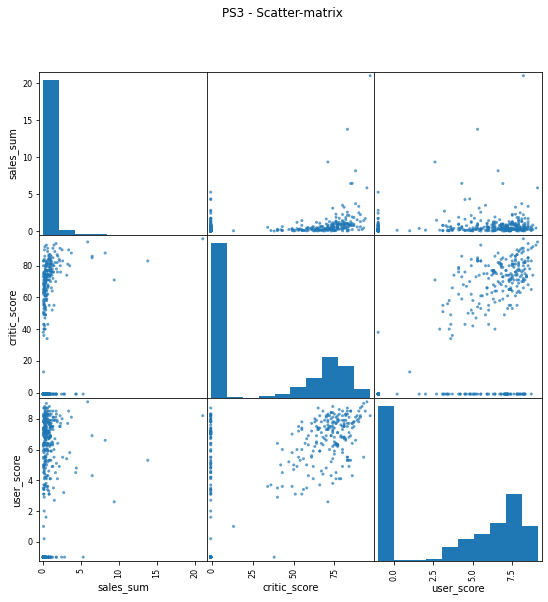

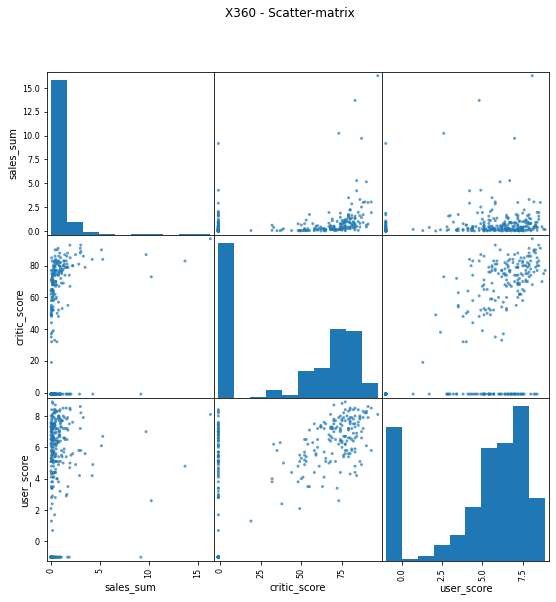

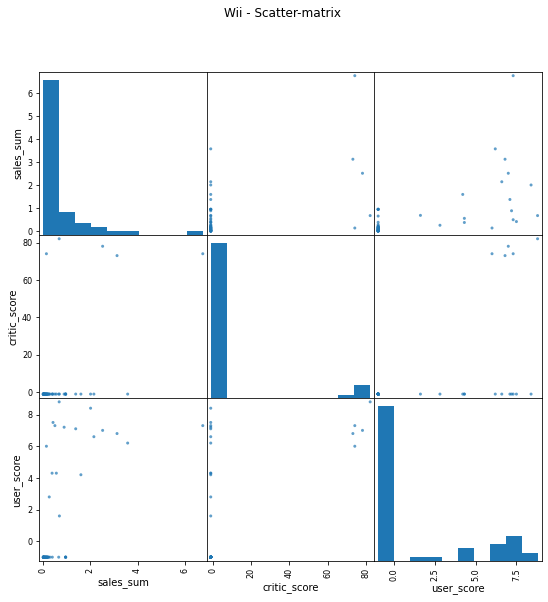

In [127]:
# scatter matrix for platforms
for i in anal_platform:
    corr_mat_df = anal_df[anal_df['platform'] == i]
    corr_mat_df = corr_mat_df[['sales_sum', 'critic_score', 'user_score']]
    pd.plotting.scatter_matrix(corr_mat_df, figsize=(9, 9), alpha=0.7)
    plt.suptitle('{} - Scatter-matrix'.format(i));


Correlation for PS3 shows that critics score is directly proportional to sales (Pearson coefficient = 0.2). For the X360, the trend is similar, although the significance of users score is higher (Pearson coefficient = 0.3).

For the data that is available for the Wii, the significance of users and critics score is high and amounts to 0.3 and 0.4, respectively.

In [128]:
# distribution of games by genres
anal_genre_df = (
anal_df.groupby(['genre'], as_index=False)
.agg({'sales_sum': 'median'}).sort_values(['sales_sum'], ascending=False)
)
anal_genre_df.rename({'sales_sum' : 'sales_median'}, axis=1, inplace=True)
display(anal_genre_df)

,genre,sales_median
8,Shooter,0.4
10,Sports,0.2
4,Platform,0.2
7,Role-Playing,0.1
6,Racing,0.1
2,Fighting,0.1
0,Action,0.1
3,Misc,0.1
9,Simulation,0.1
11,Strategy,0.1


In [129]:
# genres with highest sales for new games
top_genre_df = anal_genre_df.head()

In [130]:
# list of genres
top_genre = list(top_genre_df['genre'])
# generate data for boxplot
def hist_data_genre(genre):
   return anal_df.loc[anal_df.genre == genre, ['sales_sum']]\
          .reset_index(drop=True)\
          .rename({'sales_sum': genre}, axis=1)

In [131]:
# data for boxplot
sports_df = hist_data_genre(top_genre[0])
shooter_df = hist_data_genre(top_genre[1])
platform_df = hist_data_genre(top_genre[2])
fighting_df = hist_data_genre(top_genre[3])
action_df = hist_data_genre(top_genre[4])

In [132]:
# combine data for boxplot
hist_data_genre_conc = pd.concat([sports_df, shooter_df, platform_df, fighting_df, action_df], axis=1)

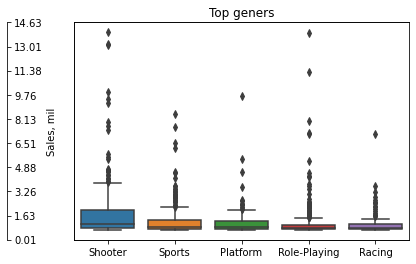

In [133]:
# build a boxplot 
ax_genre = sns.boxplot(data=hist_data_genre_conc)

plt.yticks([])
ax_genre.set_ylabel('')

# add an axis on the left
ax1_genre = ax_genre.twinx()
ax1_genre.set_yticks(np.linspace(sports_df['Shooter'].min(), sports_df['Shooter'].max(), 10))
ax1_genre.spines['right'].set_position(('axes', -0.2))
ax1_genre.set_ylabel('Sales, mil')
ax1_genre.set_title('Top geners')
plt.show()

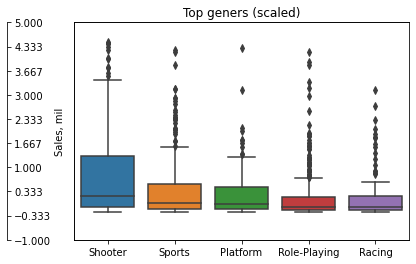

In [149]:
# build a boxplot (scaled) 
ax_zoom_genre = sns.boxplot(data=hist_data_genre_conc)

plt.yticks([])
ax_zoom_genre.set_ylabel('')
ax_zoom_genre.set_ylim(top=5)

# add an axis on the left
ax2_genre = ax_zoom_genre.twinx()
ax2_genre.set_yticks(np.linspace(-1, 5, 10))
ax2_genre.spines['right'].set_position(('axes', -0.2))
ax2_genre.set_ylabel('Sales, mil')
ax2_genre.set_title('Top geners (scaled)')
plt.show()

For all genres, the lower "whisker" rests on 0, this is the minimum value. For Shooter, the upper ends at about 1.5 million, Sports - 0.6 million, Platform - 1 million, Action - 0.9 million, Fighting - 0.2 million - this is 1.5 interquartile range added to the 3rd quartile. This is the approximate limit of the normal range. Everything behind it is considered an outlier.

According to the median, most of the sales for Shooter, Sports, Action, and Platform are 0.2 million, and for Fighting, 0.1 million. In the range of 0.1 to 1.4 million copies, 50% of all sales for Shooter, 0 - 0.6 for Sports and Action, 0 - 0.3 for Platform and 0 - 0.2 for Fighting.

### Step 4. User characteristics

In [135]:
# analysis of users
class User:
     
     def __init__ (self, data):
          self.data = data

     # build a table top-5                
     def top_5(self, param, region):
          top_5 = self.data[[param, region]]
          top_5_table = \
          top_5.groupby(param)\
          .max()\
          .sort_values(region, ascending=False)\
          .reset_index(drop=False)\
          .head()
          return top_5_table

     # buid a pie chart 
     def pie_chart(table, top_df, column, region):
          top_df['top_5'] = top_df[column]
          top_df['top_5'] = top_df['top_5']\
          .where(top_df[column].isin(table[column]), 'Other')
          top_df.groupby(['top_5']).sum().plot(kind='pie', y=region, title=region)

In [136]:
# variables for functions
region_sales = ['na_sales', 'eu_sales', 'jp_sales']
column_type = ['platform', 'genre']

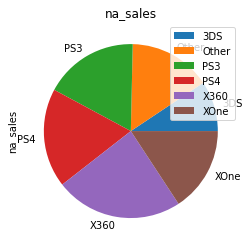

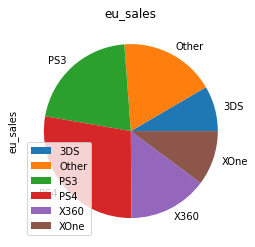

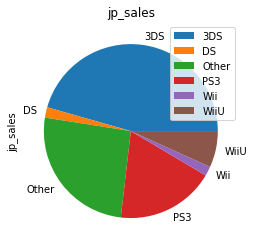

In [137]:
# print out pie charts for 'platform'
for i in range(len(region_sales)):
    temp = User.top_5(User(anal_df), column_type[0], region_sales[i])
    User.pie_chart(temp, anal_df, column_type[0], region_sales[i])

Distribution by regions shows that in America, the X360 has a large market share, followed by the same shares of PS3, PS4 and XOne. In Europe, the PS3 and PS4 dominate, while in Japan the 3DS has taken over the market, although PS3 and WiiU are also present.

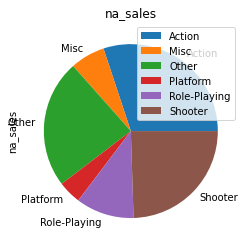

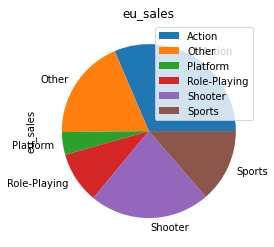

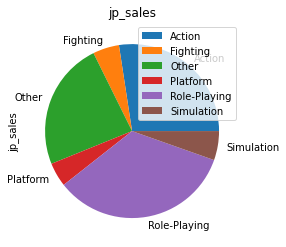

In [138]:
# print out pie charts for 'genre'
for i in range(len(region_sales)):
    temp = User.top_5(User(anal_df), column_type[1], region_sales[i])
    User.pie_chart(temp, anal_df, column_type[1], region_sales[i])


In America, users prefer Action and Shooter. In Europe, the same leaders, plus Sports. In Japan, they mainly play Role-Playing and Action.

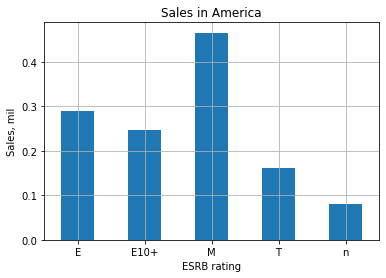

In [139]:
# bar chart of relationship between sales and ESRB ranking in America 
(
    anal_df.groupby('rating')['na_sales'].mean()
    .plot(xlabel='ESRB rating', ylabel='Sales, mil', kind='bar', 
          rot=0, grid=True, title='Sales in America')
);

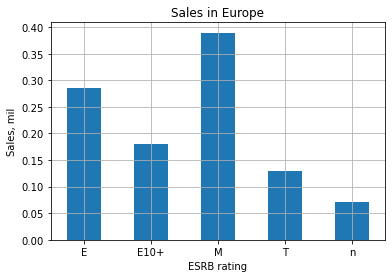

In [140]:
# bar chart of relationship between sales and ESRB ranking in Europe
(
    anal_df.groupby('rating')['eu_sales'].mean()
    .plot(xlabel='ESRB rating', ylabel='Sales, mil', kind='bar', 
          rot=0, grid=True, title='Sales in Europe')
);

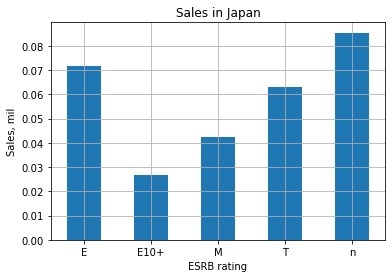

In [141]:
# bar chart of relationship between sales and ESRB ranking in Japan 
(
    anal_df.groupby('rating')['jp_sales'].mean()
    .plot(xlabel='ESRB rating', ylabel='Sales, mil', kind='bar', 
          rot=0, grid=True, title='Sales in Japan')
);


America and Europe have the highest sales of 'M' rated games for 17+ users.

Japan has the highest sales of 'E' and unrated games for users of all ages.

### Step 5. Hypothesis testing

Based on the generally used practice, the null hypothesis is accepted as the equality of the average values of both samples. Thus, the alternative hypothesis is two-sided and specifies that the average of the two samples of the data are not equal to each other.

In [142]:
# test the equality of the average values of both samples
def t_test_1(data_1, data_2):  
    
    # threshold for statistical significance
    alpha = 0.05 
    results = st.ttest_ind(data_1, data_2)
    print('p-value:', results.pvalue)
    
    if results.pvalue < alpha:
        print('Reject null hypothesis')
    else:
        print('Support null hypothesis')

In [143]:
# test the equality of the average values of sales for PC and Xbox One platforms
t_test_1(x_one_list, pc_list)

p-value: 1.3896435533548819e-05
Reject null hypothesis


In [144]:
# average values
print('Average value of "x_one_list":', statistics.mean(x_one_list))
print('Average value of "pc_list":', statistics.mean(pc_list))

Average value of "x_one_list": 6.521428571428571
Average value of "pc_list": 7.062467532467532



Null hypothesis is accepted as inequality of the average values of both samples. Thus, the alternative hypothesis is two-sided and specifies that the average of the two samples are equal to each other.

In [145]:
# test the equality of the average values of both samples
def t_test_2(data_1, data_2):    
    
    # threshold for statistical significance
    alpha = 0.05             
    results = st.ttest_ind(data_1, data_2)
    print('p-value:', results.pvalue)

    if results.pvalue > alpha:
        print('Reject null hypothesis')
    else:
        print('Support null hypothesis')

In [146]:
# test the inequality of the average values of sales for Sports and Action genres
t_test_2(sports_list, action_list)

p-value: 0.10406951359049141
Reject null hypothesis


In [147]:
# average values
print('Среднее значение "sports_list" =', statistics.mean(sports_list))
print('Среднее значение "action_list" =', statistics.mean(action_list))

Среднее значение "sports_list" = 6.96119673617407
Среднее значение "action_list" = 7.054043715846994


As the t-test showed, when comparing the average sales values for the PC and Xbox One platforms, the null hypothesis is rejected in favor of the alternative one. This means that the averages are not equal. When testing the average sales values for the Sports and Action genres, the null hypothesis is also rejected because the averages are equal according to the chosen statistical significance threshold alpha of 0.05.

### Conclusions

By analyzing the highest sales in all regions, it is clear that the Wii platform with games of the Sports genre significantly outperforms its competitors with 82.5 million copies sold, although this trend was in 2008-2010.

In recent years, the PS3 platform shows more stable sales until 2016 with a maximum value of 21.1 million. X360 is in second place with 16.3 million, but since 2011 the sales frequency has dropped sharply.

According to the median value since 2011, the majority of sales for the PS3 is 0.3 million, for the X360 and Wii - 0.5 million. In the range from 0.1 to 1 million copies, 50% of all sales are X360 and Wii, 0 - 0.5 are PS3.

For the global market, it is concluded that the PS3 platform is more profitable at the moment. The X360 and Wii platforms have the potential to regain the profit, but this is affected by critics and users score. The X360 is significantly affected by the critics score (correlation coefficient 0.3), while the Wii is all rated with the same coefficient.

In terms of genres, the leaders are Shooter and Sports with sales of 0.4 and 0.3 million respectively. The median values ​​for them are 0.2 million. The range from 0.1 to 1.4 million copies is 50% of all sales for Shooter and 0 - 0.6 for Sports.

The distribution by regions shows that in America, the X360 has a large market share, followed by the same shares of PS3, PS4 and Wii. In Europe, the PS3 and PS4 dominate, while in Japan 3DS has taken over the market, although PS3 and Wii are also present.

In America, users prefer Racing and Role-Playing. In Europe, the same leaders, plus Sports. In Japan, the same as in America and Europe, only the Platform genre replaces Sports. In general, the ESRB rating shows that more sales are for users 17+ and also for all ages.